### Problem 1


--- Uncorrupted ---
The weights discovered: 1.558960
The total loss: 0.491908


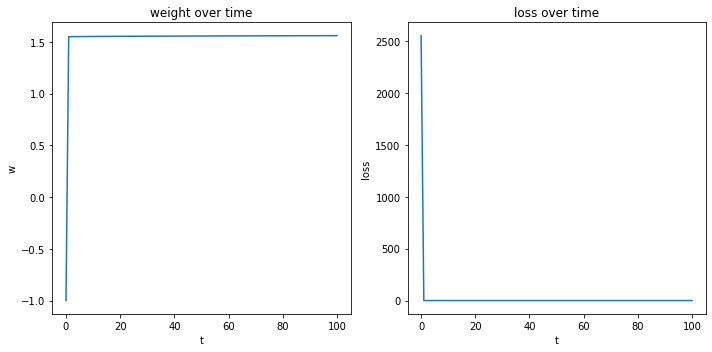



--- Corrupted ---
The weights discovered: 0.046149
The total loss: 52.990416


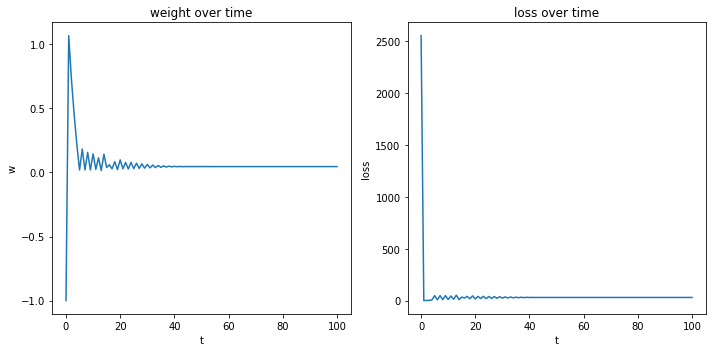

--- Uncorrupted ---
The weights discovered: 1.605684
The total loss: 0.465095


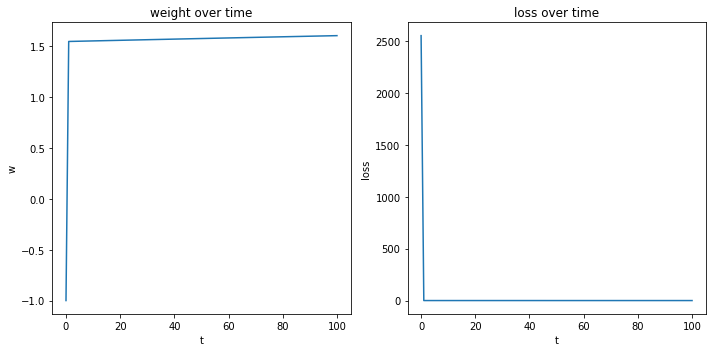



--- Corrupted ---
The weights discovered: 1.846138
The total loss: 886.498078


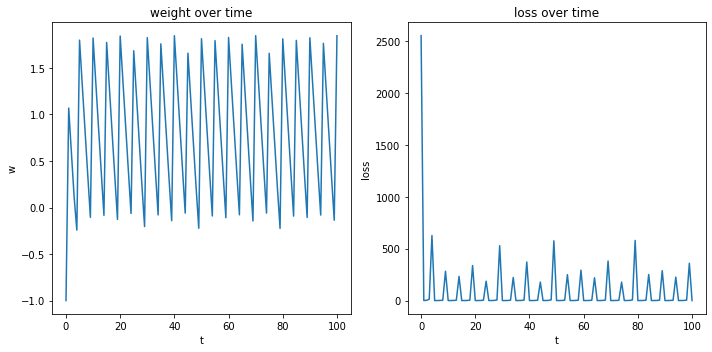

In [32]:
import numpy as np
import time
import matplotlib.pyplot as plt
np.random.seed(1000)

def gradientLoss(x,y,w):
  return (-y)*(1/(1+np.exp(y*x*w)))*x

def lossSingular(x,y,w):
  return np.log(1+np.exp(-y*x*w))

def totalLoss(X,Y,w):
  return sum([lossSingular(x,y,w) for (x,y) in zip(X,Y)])

def gradient(X,Y,w):
  return sum([gradientLoss(x,y,w) for (x,y) in zip(X,Y)])

def gradientDesc(X,Y,w_0,eta = lambda t: 1.0, max_iter=100):
  turns = 0
  w = w_0
  w_lst = [w]
  while(turns<max_iter):
    g = gradient(X,Y,w)
    w = w - eta(turns)*g
    w_lst.append(w)
    turns+=1
  return w, w_lst

def showPlot(X,Y,w_lst,xlabel,ylabel_1,ylabel_2,title_1,title_2):
  l_lst = [totalLoss(X,Y,w) for w in w_lst]
  fig,axs = plt.subplots(figsize=(10,5),nrows=1,ncols=2)
  axs[0].plot(list(range(0,101)),w_lst)
  axs[1].plot(list(range(0,101)),l_lst)
  axs[0].set_xlabel(xlabel)
  axs[0].set_ylabel(ylabel_1)
  axs[0].set_title(title_1)
  axs[1].set_xlabel(xlabel)
  axs[1].set_ylabel(ylabel_2)
  axs[1].set_title(title_2)
  fig.tight_layout()
  plt.show()
  

def main():
  print("--- Uncorrupted ---")
  X = np.concatenate((np.arange(-50,0,1),np.arange(1,51)))
  Y = np.concatenate((np.full(50,-1),np.full(50,1)))
  w_0 = -1
  w,w_lst = gradientDesc(X,Y,w_0,eta = lambda t: 0.001/np.sqrt(t+1))
  print("The weights discovered: %f"%w)
  print("The total loss: %f"%totalLoss(X,Y,w))
  showPlot(X,Y,w_lst,"t","w","loss","weight over time","loss over time")
  print("\n")
  print("--- Corrupted ---")
  Y_ = np.copy(Y)
  for i in range(5):
    Y_[i] = 1
    Y_[100-1-i] = -1
  w,w_lst = gradientDesc(X,Y_,w_0,eta = lambda t: 0.001/np.sqrt(t+1))
  print("The weights discovered: %f"%w)
  print("The total loss: %f"%totalLoss(X,Y_,w))
  showPlot(X,Y,w_lst,"t","w","loss","weight over time","loss over time")

  print("--- Uncorrupted ---")
  w,w_lst = gradientDesc(X,Y,w_0,eta = lambda t: 0.001)
  print("The weights discovered: %f"%w)
  print("The total loss: %f"%totalLoss(X,Y,w))
  l_lst = [totalLoss(X,Y,w) for w in w_lst]
  showPlot(X,Y,w_lst,"t","w","loss","weight over time","loss over time")
  print("\n")
  print("--- Corrupted ---")
  Y_ = np.copy(Y)
  for i in range(5):
    Y_[i] = 1
    Y_[100-1-i] = -1
  w,w_lst = gradientDesc(X,Y_,w_0,eta = lambda t: 0.001)
  print("The weights discovered: %f"%w)
  print("The total loss: %f"%totalLoss(X,Y_,w))
  showPlot(X,Y,w_lst,"t","w","loss","weight over time","loss over time")
  

if __name__ == "__main__":
  main()

### Problem 3

Size of the x*: 13.032558
f(x*): 262.611318


--- Gradient Descent ---
Time elapsed: 0.025721073150634766 seconds
Error in the resultant vector (l2 norm of x-x*): 0.943287
f(x): 140.943253


--- Matrix Inverse ---
Time elapsed: 0.035478830337524414 seconds
Error in the resultant vector (l2 norm of x-x*): 0.861995
f(x): 134.013415


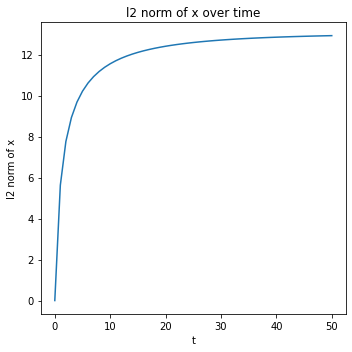

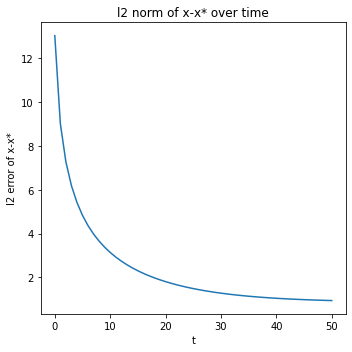

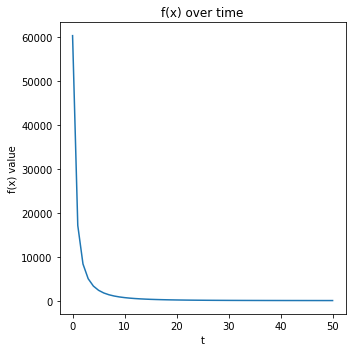

In [28]:
import numpy as np
import time
import matplotlib.pyplot as plt
np.random.seed(1000)

def generateMatrix(dim):
  return np.random.choice(np.linspace(-1,1), size=dim)

def generateA(n,m):
  return generateMatrix((m,n))

def generateX(n):
  return generateMatrix(n)

def generateEta(m):
  return np.random.normal(0.0,0.5,size=m)

def gradientF(AtA,x,Atb):
  return np.dot(AtA,x)-Atb

def gradientDescent(x_0, A, b, st_sze, max_iter = 50, tol = 1e-4):
  turns = 0
  err = np.inf
  x = x_0
  x_lst = [x_0]
  AtA = np.dot(np.transpose(A),A)
  Atb = np.dot(np.transpose(A),b)
  while(turns<max_iter and err>tol):
    x_ = x - st_sze*gradientF(AtA,x,Atb)
    turns += 1
    x = x_
    x_lst.append(x)
  return x,x_lst

def getFunctionValue(A,b,x):
  y = np.dot(A,x) - b
  return np.linalg.norm(y)**2

def showPlot(x,y,xlabel,ylabel,title):
  fig,axs = plt.subplots(figsize=(5,5),nrows=1)
  axs.plot(x,y)
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  fig.tight_layout()
  plt.show()

def main():
  n = 500
  m = 2*n
  A = generateA(n,m)
  x_star = generateX(n)
  eta = generateEta(m)
  b = np.dot(A,x_star)+eta
  start_time = time.time()
  x,x_lst = gradientDescent(np.full(n,0), A, b, 1e-3)
  print("Size of the x*: %f"%np.linalg.norm(x_star))
  print("f(x*): %f"%getFunctionValue(A,b,x_star))
  print("\n")
  print("--- Gradient Descent ---")
  print("Time elapsed: %s seconds" % (time.time() - start_time))
  print("Error in the resultant vector (l2 norm of x-x*): %f"%np.linalg.norm(x-x_star))
  print("f(x): %f"%getFunctionValue(A,b,x))
  e_lst = [np.linalg.norm(x-x_star) for x in x_lst]
  f_lst = [getFunctionValue(A,b,x) for x in x_lst]
  
  start_time = time.time()
  x_ = np.dot(np.linalg.inv(np.dot(np.transpose(A),A)),np.dot(np.transpose(A),b))
  print("\n")
  print("--- Matrix Inverse ---")
  print("Time elapsed: %s seconds" % (time.time() - start_time))
  print("Error in the resultant vector (l2 norm of x-x*): %f"%np.linalg.norm(x_-x_star))
  print("f(x): %f"%getFunctionValue(A,b,x_))
  showPlot(list(range(len(x_lst))),[np.linalg.norm(x) for x in x_lst],"t","l2 norm of x","l2 norm of x over time")
  showPlot(list(range(len(x_lst))),e_lst,"t","l2 error of x-x*","l2 norm of x-x* over time")
  showPlot(list(range(len(x_lst))),f_lst,"t","f(x) value","f(x) over time")

if __name__ == "__main__":
    main()

### Problem 4

The true minimum: (0.502500,0.000000)


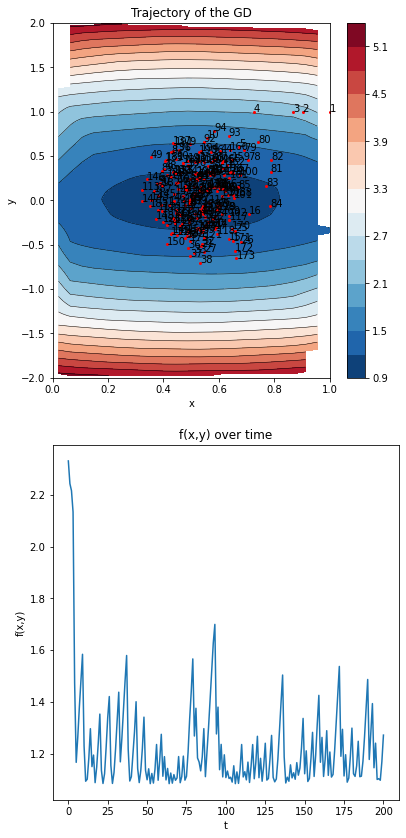

The SGD minimum with 0.1: (0.512297,0.433282)
The error with 0.1: 0.433393


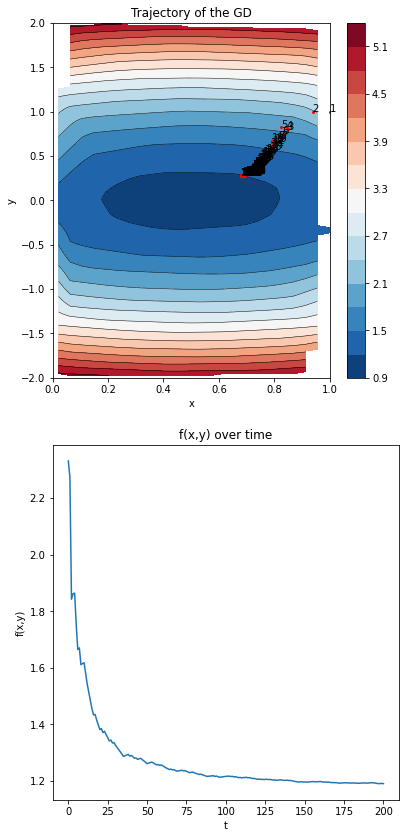

The SGD minimum with 0.1/(t+1): (0.678506,0.275730)
The error with 0.1/(t+1): 0.327117


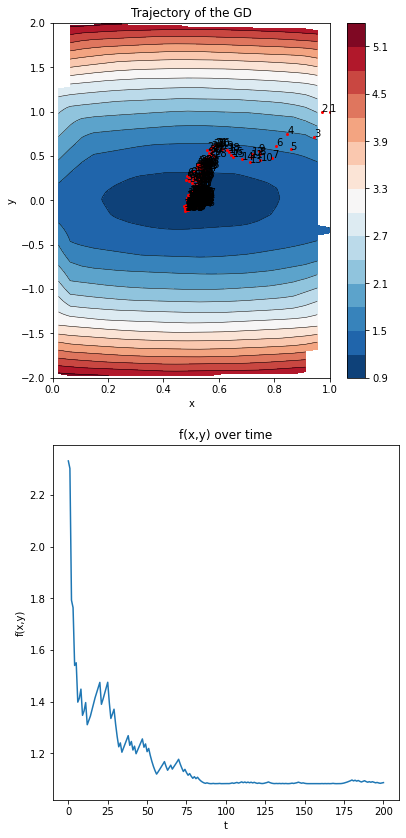

The SGD minimum with 0.1/sqrt(t+1): (0.500289,-0.063540)
The error with 0.1/sqrt(t+1): 0.063578


In [30]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
np.random.seed(1000)
import time

def gradient(x,a,y,b):
  return np.array([2*(x-a),2*(y-b)])

def getAB(i,n):
  if(i>n):
    return ((i-n)/n,-1)
  return (i/n,1)

def stochasticGD(st, eta, n, max_iter = 200):
  turns = 0
  x_lst = [st]
  while(turns<max_iter):
    i = np.random.choice(np.arange(1,2*n+1))
    a,b = getAB(i,n)
    st = st - eta(turns)*gradient(st[0],a,st[1],b)
    turns+=1
    x_lst.append(st)
  return st,x_lst

def fValue(x,y,n):
  s = 0.0
  for i in range(1,2*n+1):
    (a,b) = getAB(i,n)
    s += ((x-a)**2+(y-b)**2)/(2*n)
  return s

def showPlot(x,y,z,x_lst,xlabel_spec,ylabel_spec,title_spec,xlabel_func,ylabel_func,title_func,n,ngridx,ngridy):
  fig, (ax1,ax2) = plt.subplots(figsize=(6,12),nrows=2)
  xi = np.linspace(-2.1, 2.1, ngridx)
  yi = np.linspace(-2.1, 2.1, ngridy)
  triang = tri.Triangulation(x, y)
  interpolator = tri.LinearTriInterpolator(triang, z)
  Xi, Yi = np.meshgrid(xi, yi)
  zi = interpolator(Xi, Yi)
  ax1.contour(xi, yi, zi, levels=14, linewidths=0.5, colors='k')
  cntr1 = ax1.contourf(xi, yi, zi, levels=14, cmap="RdBu_r")
  fig.colorbar(cntr1, ax=ax1)
  x_d = []
  y_d = []
  for k in x_lst:
    x_d.append(k[0])
    y_d.append(k[1])
  #u = np.diff(x_d)
  #v = np.diff(y_d)
  #pos_x = x_d[:-1] + u/2
  #pos_y = y_d[:-1] + v/2
  #norm = np.sqrt(u**2+v**2) 
  #ax1.quiver(pos_x, pos_y, u/norm, v/norm, angles="xy", zorder=5, pivot="mid", color="k")
  ax1.plot(x_d, y_d, 'ro', ms=2)
  for i in range(len(x_d)):
    ax1.annotate(str(i+1), (x_d[i], y_d[i]))
  ax1.set(xlim=(0, 1), ylim=(-2, 2))
  ax1.set_xlabel(xlabel_spec)
  ax1.set_ylabel(ylabel_spec)
  ax1.set_title(title_spec)
  f_lst = [fValue(dt[0],dt[1],n) for dt in x_lst]
  ax2.plot(list(range(len(f_lst))),f_lst)
  ax2.set_title(title_func)
  ax2.set_xlabel(xlabel_func)
  ax2.set_ylabel(ylabel_func)
  fig.tight_layout(pad=2.0)
  plt.show()

def main():
  n = 200
  p = [(i/n,-1) for i in range(1,n+1)]+[(i/n,1) for i in range(1,n+1)]
  npts = 200
  x = np.random.uniform(0, 1, npts)
  y = np.random.uniform(-2, 2, npts)
  z = (1/(2*n))*sum([(x-a)**2+(y-b)**2 for (a,b) in p])
  ngridx = 100
  ngridy = 200
  
  #ax1.plot(x, y, 'ko', ms=3)
  
  w = np.array([(n+1)/(2*n),0])
  print("The true minimum: (%f,%f)"%(w[0],w[1]))
  s,x_lst = stochasticGD(np.array([1,1]), lambda t: 0.1, n)
  showPlot(x,y,z,x_lst,"x","y","Trajectory of the GD","t","f(x,y)","f(x,y) over time",n,ngridx,ngridy)
  print("The SGD minimum with 0.1: (%f,%f)"%(s[0],s[1]))
  print("The error with 0.1: %f"%np.linalg.norm(s-w))

  s,x_lst = stochasticGD(np.array([1,1]), lambda t: 0.1/(t+1), n)
  showPlot(x,y,z,x_lst,"x","y","Trajectory of the GD","t","f(x,y)","f(x,y) over time",n,ngridx,ngridy)
  print("The SGD minimum with 0.1/(t+1): (%f,%f)"%(s[0],s[1]))
  print("The error with 0.1/(t+1): %f"%np.linalg.norm(s-w))

  s,x_lst = stochasticGD(np.array([1,1]), lambda t: 0.1/np.sqrt(t+1), n)
  showPlot(x,y,z,x_lst,"x","y","Trajectory of the GD","t","f(x,y)","f(x,y) over time",n,ngridx,ngridy)
  print("The SGD minimum with 0.1/sqrt(t+1): (%f,%f)"%(s[0],s[1]))
  print("The error with 0.1/sqrt(t+1): %f"%np.linalg.norm(s-w))

if __name__ == "__main__":
  main()

